# Prediction using supervised ML algorithm

# Predicting the precentage of an student based on the number of study hours

# libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# reading the data

In [2]:
url = "http://bit.ly/w-data"
Data = pd.read_csv(url)
print("Data imported successfully")

Data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


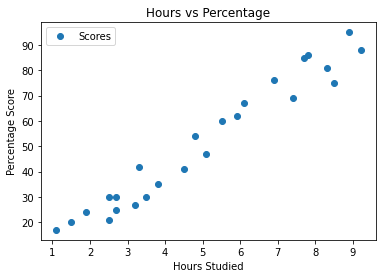

In [3]:
Data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# preparing the data 

In [4]:
x=Data.iloc[:,:-1].values
y=Data.iloc[:,1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

# spacifying the training and test sets

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

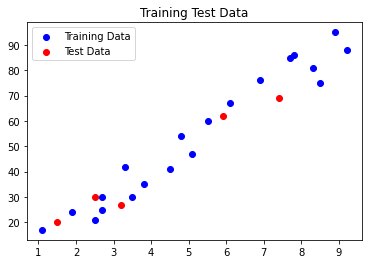

In [6]:
#test train split visualization by scatter plot
plt.scatter(x_train,y_train, label="Training Data", color="b")
plt.scatter(x_test,y_test, label="Test Data", color="r")
plt.legend()
plt.title("Training Test Data")
plt.show()

# training the data by LR algorithm

In [7]:
LR = LinearRegression()  
LR.fit(x_train, y_train) 
print(LR.coef_)
print("Training complete.")

[9.91065648]
Training complete.


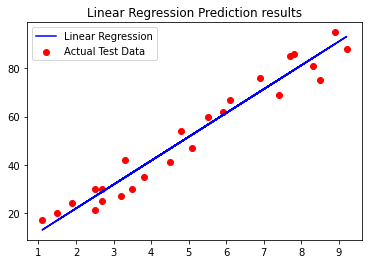

In [16]:
# use the model to predict the test data

line = LR.coef_*x+LR.intercept_

# ploting the results
plt.plot(x,line,label="Linear Regression",color="b")
plt.scatter(x,y, label="Actual Test Data", color="r")
plt.legend()
plt.title("Linear Regression Prediction results")
plt.show()


# predicting the scores

In [9]:
print(x_test) # Testing data - In Hours
y_pred = LR.predict(x_test) # Predicting the scores
y_pred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# comparing the actual data with the predicted data


In [10]:
df=pd.DataFrame({"Actual": y_test,"Predicted":y_prediction})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
# predicting score of student with a study hours 5
LR.predict(np.array([[5]]))

array([51.57144244])

In [12]:
hours = 9.25
own_pred =LR.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluating the model

In [13]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_prediction)) 

Mean Absolute Error: 4.183859899002975


In [14]:
LR.score(x_test,y_test)

0.9454906892105356